In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  


In [2]:
# Load data
df = pd.read_csv(r'C:\Users\ask12\Desktop\ML Projects\Churn Prediction\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop customerID (not predictive)
df.drop(columns=["customerID"], inplace=True)

# Quick checks
print(df.shape)
print(df.columns)
df.head()

(7043, 20)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Convert 'TotalCharges' to numeric (some values are empty strings)
# Use 'coerce' to convert errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Optional: reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Confirm change
print(df['TotalCharges'].dtype)
print(df.shape)

float64
(7032, 20)


In [4]:
# Assuming df is your DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [5]:
encoder = LabelEncoder()
for feature in categorical_cols:
    df[feature] = encoder.fit_transform(df[feature])

In [6]:
# splitting dataset into dependent and independent feature
X = df.drop(columns='Churn')
y = df['Churn']

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif  # or chi2, mutual_info_classif

selector = SelectKBest(score_func=f_classif, k=10)  # change k as needed
X_selected = selector.fit_transform(X, y)


In [8]:
# Assuming X is a DataFrame
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print("Selected Features:", selected_features.tolist())


Selected Features: ['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


In [9]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)

log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(y_test, log_pred)}')
print(f'Confusion matrix :\n{confusion_matrix(y_test, log_pred)}')
print(f'Classification report :\n{classification_report(y_test, log_pred)}')


Accuracy score : 0.7945984363894811
Confusion matrix :
[[907 111]
 [178 211]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1018
           1       0.66      0.54      0.59       389

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



c:\Users\ask12\Desktop\ML Projects\Churn Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

Rfc = RandomForestClassifier(
    n_estimators=120,
    criterion='gini',
    max_depth=15,
    min_samples_leaf=10,
    min_samples_split=5
)

Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

# Correct metric order: y_true, y_pred
print(f'Accuracy score : {accuracy_score(y_test, rfc_pred)}')
print(f'Confusion matrix :\n{confusion_matrix(y_test, rfc_pred)}')
print(f'Classification report :\n{classification_report(y_test, rfc_pred)}')

# Optional: ROC-AUC score
rfc_probs = Rfc.predict_proba(X_test)[:, 1]
print(f'ROC-AUC score : {roc_auc_score(y_test, rfc_probs)}')


Accuracy score : 0.806680881307747
Confusion matrix :
[[933  85]
 [187 202]]
Classification report :
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1018
           1       0.70      0.52      0.60       389

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC-AUC score : 0.8561989585911182


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    use_label_encoder=False,
    eval_metric='logloss'  # avoid warning for classification
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
print(f'Accuracy score : {accuracy_score(y_test, xgb_pred)}')
print(f'Confusion matrix :\n{confusion_matrix(y_test, xgb_pred)}')
print(f'Classification report :\n{classification_report(y_test, xgb_pred)}')

# ROC-AUC
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
print(f'ROC-AUC score : {roc_auc_score(y_test, xgb_probs)}')


Accuracy score : 0.7931769722814499
Confusion matrix :
[[915 103]
 [188 201]]
Classification report :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1018
           1       0.66      0.52      0.58       389

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC score : 0.8510613582759683

Confusion matrix :
[[915 103]
 [188 201]]
Classification report :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1018
           1       0.66      0.52      0.58       389

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC score : 0.8510613582759683


c:\Users\ask12\Desktop\ML Projects\Churn Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [13]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Initialize SMOTEENN
st = SMOTEENN(random_state=42)

# Apply SMOTE + Edited Nearest Neighbors
X_train_st, y_train_st = st.fit_resample(X_train, y_train)

# Print class distribution
print("The number of classes before fit:", Counter(y_train))
print("The number of classes after fit :", Counter(y_train_st))


The number of classes before fit: Counter({0: 4145, 1: 1480})
The number of classes after fit : Counter({1: 2627, 0: 2112})


In [14]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [15]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.95042194092827
Confusion matrix :
 [[396  17]
 [ 30 505]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       413
           1       0.97      0.94      0.96       535

    accuracy                           0.95       948
   macro avg       0.95      0.95      0.95       948
weighted avg       0.95      0.95      0.95       948



In [16]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.939873417721519
Confusion matrix :
 [[393  24]
 [ 33 498]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       417
           1       0.95      0.94      0.95       531

    accuracy                           0.94       948
   macro avg       0.94      0.94      0.94       948
weighted avg       0.94      0.94      0.94       948



c:\Users\ask12\Desktop\ML Projects\Churn Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from xgboost import XGBClassifier

xgb_sampling = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_sampling.fit(X_train_sap, y_train_sap)
xgb_sampling_pred = xgb_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(y_test_sap, xgb_sampling_pred)}')
print(f'Confusion matrix :\n{confusion_matrix(y_test_sap, xgb_sampling_pred)}')
print(f'Classification report :\n{classification_report(y_test_sap, xgb_sampling_pred)}')

# ROC-AUC
xgb_sampling_probs = xgb_sampling.predict_proba(X_test_sap)[:, 1]
print(f'ROC-AUC score : {roc_auc_score(y_test_sap, xgb_sampling_probs)}')


Accuracy score : 0.9609704641350211
Confusion matrix :
[[403  23]
 [ 14 508]]
Classification report :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       426
           1       0.96      0.97      0.96       522

    accuracy                           0.96       948
   macro avg       0.96      0.96      0.96       948
weighted avg       0.96      0.96      0.96       948

ROC-AUC score : 0.9928610616444516


c:\Users\ask12\Desktop\ML Projects\Churn Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try (increase for better results)
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train_sap, y_train_sap)
print("Best Parameters:", random_search.best_params_)

best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(X_test_sap)
y_prob = best_xgb.predict_proba(X_test_sap)[:, 1]

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print(f'Accuracy : {accuracy_score(y_test_sap, y_pred)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test_sap, y_pred)}')
print(f'Classification report:\n{classification_report(y_test_sap, y_pred)}')
print(f'ROC-AUC : {roc_auc_score(y_test_sap, y_prob)}')



Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\ask12\Desktop\ML Projects\Churn Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:39:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Accuracy : 0.9588607594936709
Confusion matrix:
[[405  21]
 [ 18 504]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       426
           1       0.96      0.97      0.96       522

    accuracy                           0.96       948
   macro avg       0.96      0.96      0.96       948
weighted avg       0.96      0.96      0.96       948

ROC-AUC : 0.9924608313996366


In [36]:
import pandas as pd

# Example new customer input (replace with real values)
new_customer = pd.DataFrame([{
    'gender': 1,
    'SeniorCitizen': 0,
    'Partner': 0,
    'Dependents': 0,
    'tenure': 2,
    'PhoneService': 1,
    'MultipleLines': 0,
    'InternetService': 2,
    'OnlineSecurity': 0,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 0,
    'Contract': 0,
    'PaperlessBilling': 1,
    'PaymentMethod': 2,
    'MonthlyCharges': 95.7,
    'TotalCharges': 170.1
}])

# Predict churn probability and class
churn_prob = best_xgb.predict_proba(new_customer)[0, 1]
churn_pred = best_xgb.predict(new_customer)[0]

print(f"Prediction: {'Churn' if churn_pred == 1 else 'No Churn'}")
print(f"Churn Probability: {churn_prob:.4f}")


Prediction: Churn
Churn Probability: 0.9999


In [19]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [20]:
#Logistic Regression
Log_reg_smt = LogisticRegression(C=10, max_iter=150)    
Log_reg_smt.fit(X_train_smt, y_train_smt)
log_pred_smt = Log_reg_smt.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, log_pred_smt)}')
print(f'Confusion matrix :\n{confusion_matrix(y_test, log_pred_smt)}')
print(f'Classification report :\n{classification_report(y_test, log_pred_smt)}')


Accuracy score : 0.757640369580668
Confusion matrix :
[[783 235]
 [106 283]]
Classification report :
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1018
           1       0.55      0.73      0.62       389

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



c:\Users\ask12\Desktop\ML Projects\Churn Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Random Forest Classifier
Rfc_smt = RandomForestClassifier(n_estimators=120, criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc_smt.fit(X_train_smt, y_train_smt)
rfc_pred_smt = Rfc_smt.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, rfc_pred_smt)}')
print(f'Confusion matrix :\n{confusion_matrix(y_test, rfc_pred_smt)}')
print(f'Classification report :\n{classification_report(y_test, rfc_pred_smt)}')


Accuracy score : 0.7839374555792467
Confusion matrix :
[[832 186]
 [118 271]]
Classification report :
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1018
           1       0.59      0.70      0.64       389

    accuracy                           0.78      1407
   macro avg       0.73      0.76      0.74      1407
weighted avg       0.80      0.78      0.79      1407



#SHAP

In [24]:
import shap
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train_sap)


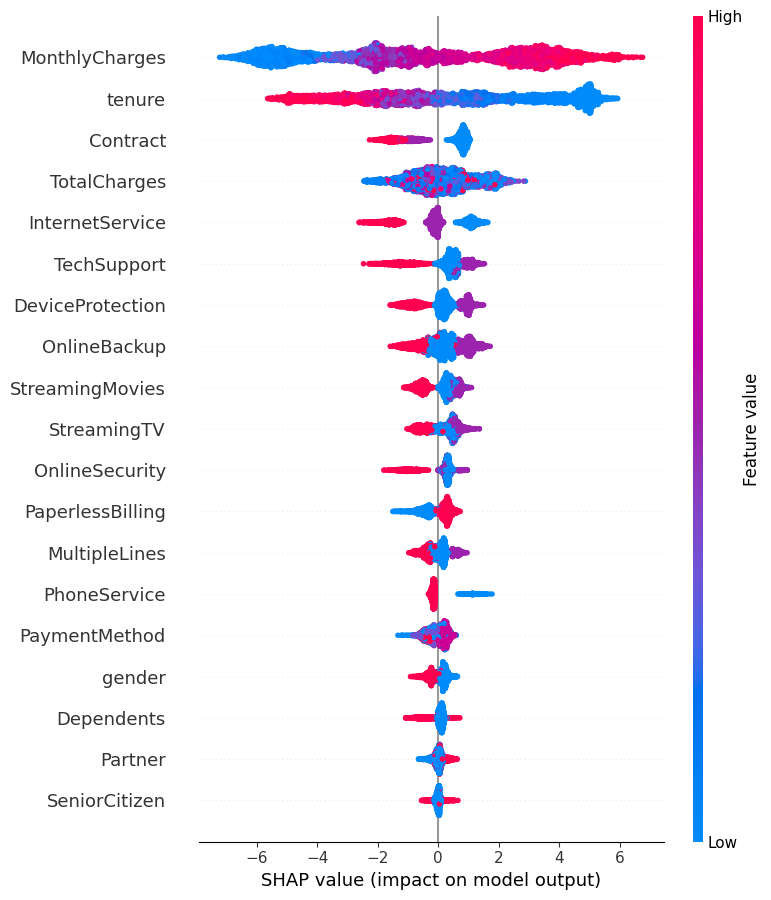

In [25]:
shap.summary_plot(shap_values, X_train_sap)


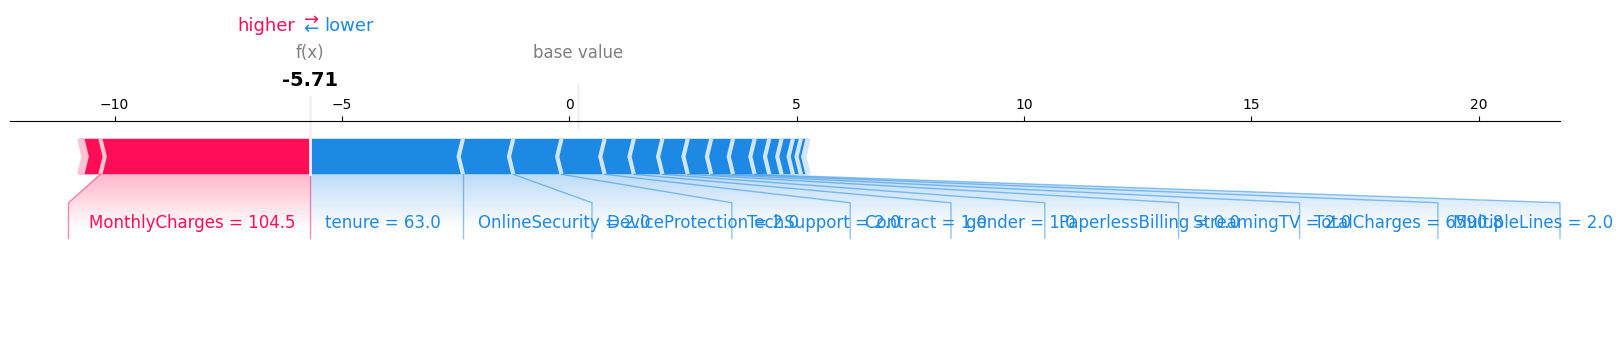

In [29]:
i = 5  # Choose any index from your training or test set
shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_train_sap.iloc[i],  # or X_test_sap.iloc[i]
    matplotlib=True
)


In [35]:
import shap
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Step 1: Compute SHAP values
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train_sap)

# Step 2: Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train_sap.columns)

# Step 3: Combine with original features and target
combined = X_train_sap.copy()
combined["churn"] = y_train_sap.values
combined["shap_sum"] = shap_df.abs().sum(axis=1)

# Step 4: Identify high-impact samples
high_impact_customers = combined.sort_values(by="shap_sum", ascending=False).head(50)

# Optional: Explore risky patterns
print("High-risk churner summary:")
print(high_impact_customers[high_impact_customers["churn"] == 1][["MonthlyCharges", "tenure", "Contract", "TechSupport", "OnlineSecurity"]].describe())

# Step 5: Auto-generate rules using shallow decision tree on top SHAP features
top_features = shap_df.abs().mean().sort_values(ascending=False).head(5).index.tolist()

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_sap[top_features], y_train_sap)

# Output rules
print("\n🔍 Interpretable Rules Extracted from Top SHAP Features:")
print(export_text(dt, feature_names=top_features))


High-risk churner summary:
       MonthlyCharges     tenure  Contract  TechSupport  OnlineSecurity
count       14.000000  14.000000      14.0    14.000000       14.000000
mean        73.797370  14.285714       0.0     0.285714        0.714286
std         28.078922  14.662504       0.0     0.611250        0.825420
min         20.535228   1.000000       0.0     0.000000        0.000000
25%         55.215014   2.250000       0.0     0.000000        0.000000
50%         82.087909  10.500000       0.0     0.000000        0.500000
75%         91.625156  22.750000       0.0     0.000000        1.000000
max        111.501821  42.000000       0.0     2.000000        2.000000

🔍 Interpretable Rules Extracted from Top SHAP Features:
|--- Contract <= 0.50
|   |--- InternetService <= 1.50
|   |   |--- tenure <= 22.50
|   |   |   |--- class: 1
|   |   |--- tenure >  22.50
|   |   |   |--- class: 1
|   |--- InternetService >  1.50
|   |   |--- TotalCharges <= 36.54
|   |   |   |--- class: 1
|   |   |